In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read lights and income dataframes
income_df = pd.read_csv("Resources/income.csv")
lights_df = pd.read_csv("Resources/red_lights_df_clean.csv")
speeding_count_df = pd.read_csv("Resources/speeding_count_df.csv")

In [3]:
#clean neighborhood column
lights_df["Neighbourhood"]=lights_df["Neighbourhood"].str.replace(r' \(.*\)','').str.replace('\d+', '')
lights_df

#rename neightborhood column
income_df = income_df.rename(columns ={"Cities": "Neighbourhood"})
income_df

,Unnamed: 0,Neighbourhood,Median_Income,Average_Income
0,0,Agincourt North,60162.0,73512.0
1,1,Agincourt South-Malvern West,59013.0,73156.0
2,2,Alderwood,71585.0,85206.0
3,3,Annex,57825.0,114333.0
4,4,Banbury-Don Mills,70039.0,115944.0
...,...,...,...,...
135,135,Wychwood,55941.0,84199.0
136,136,Yonge-Eglinton,72977.0,126230.0
137,137,Yonge-St.Clair,71728.0,153993.0
138,138,York University Heights,45534.0,55531.0


In [4]:
#merge dataframes
merged_df1 = pd.merge(income_df,lights_df, on="Neighbourhood")
merged_df = pd.merge(merged_df1,speeding_count_df, on="Neighbourhood") 
merged_df

,Unnamed: 0_x,Neighbourhood,Median_Income,Average_Income,Unnamed: 0_y,Hood_ID,Number of Red Lights,Speeding
0,0,Agincourt North,60162.0,73512.0,29,129,2,21
1,1,Agincourt South-Malvern West,59013.0,73156.0,72,128,1,23
2,4,Banbury-Don Mills,70039.0,115944.0,10,42,3,30
3,5,Bathurst Manor,56563.0,76823.0,19,34,2,18
4,6,Bay Street Corridor,50363.0,84580.0,5,76,5,22
...,...,...,...,...,...,...,...,...
65,129,Willowdale East,64362.0,84813.0,55,51,1,22
66,131,Willowridge-Martingrove-Richview,63701.0,81035.0,32,7,2,22
67,132,Woburn,52018.0,63651.0,2,137,6,52
68,138,York University Heights,45534.0,55531.0,44,27,1,22


In [10]:
#categories income ranges
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000]
income_range = ["<25K","25-50K","50-75K","75-100K","100-125K","125-150K","150-175K","175-200K","200-225K","225-250K","250K+"]
merged_df["Income Group"] = pd.cut(merged_df["Average_Income"], bins , labels = income_range)
merged_df.to_csv("output_data/income_lights_speeding.csv")
merged_df

,Unnamed: 0_x,Neighbourhood,Median_Income,Average_Income,Unnamed: 0_y,Hood_ID,Number of Red Lights,Speeding,Income Group
0,0,Agincourt North,60162.0,73512.0,29,129,2,21,50-75K
1,1,Agincourt South-Malvern West,59013.0,73156.0,72,128,1,23,50-75K
2,4,Banbury-Don Mills,70039.0,115944.0,10,42,3,30,100-125K
3,5,Bathurst Manor,56563.0,76823.0,19,34,2,18,75-100K
4,6,Bay Street Corridor,50363.0,84580.0,5,76,5,22,75-100K
...,...,...,...,...,...,...,...,...,...
65,129,Willowdale East,64362.0,84813.0,55,51,1,22,75-100K
66,131,Willowridge-Martingrove-Richview,63701.0,81035.0,32,7,2,22,75-100K
67,132,Woburn,52018.0,63651.0,2,137,6,52,50-75K
68,138,York University Heights,45534.0,55531.0,44,27,1,22,50-75K


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

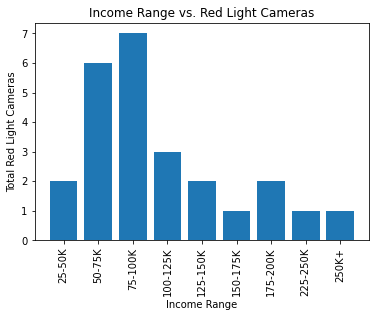

In [6]:
#plot bar graph
sorted_df = merged_df.sort_values("Average_Income")
plt.bar(sorted_df["Income Group"],sorted_df["Number of Red Lights"])
plt.title("Income Range vs. Red Light Cameras")
plt.xlabel("Income Range")
plt.ylabel("Total Red Light Cameras")
plt.xticks(rotation=90)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

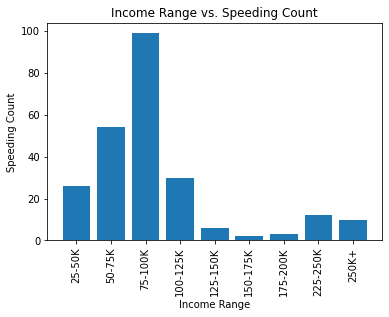

In [7]:
#plot bar graph
sorted_df = merged_df.sort_values("Average_Income")
plt.bar(sorted_df["Income Group"],sorted_df["Speeding"])
plt.title("Income Range vs. Speeding Count")
plt.xlabel("Income Range")
plt.ylabel("Speeding Count")
plt.xticks(rotation=90)
plt.tight_layout